<a href="https://colab.research.google.com/github/BAHAMLAOUHI/NLP/blob/main/Sentiment%20Analysis/Sentiment_Analysis_using_VADER_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('reviews.csv')
df.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [3]:
df.shape

(107018, 3)

In [4]:
df['Review'].values[10]

"Is there any reason why you should not apply the course by BCG?)It's content is pretty unique and includes a high level analysis and a wide range of knowledge needed to cover all detailed aspects.Best regards,Oleg Serov"

In [5]:
df['Label'].value_counts()

,count
Label,
5,79173
4,18054
3,5071
1,2469
2,2251


Text(0, 0.5, 'Frequency')

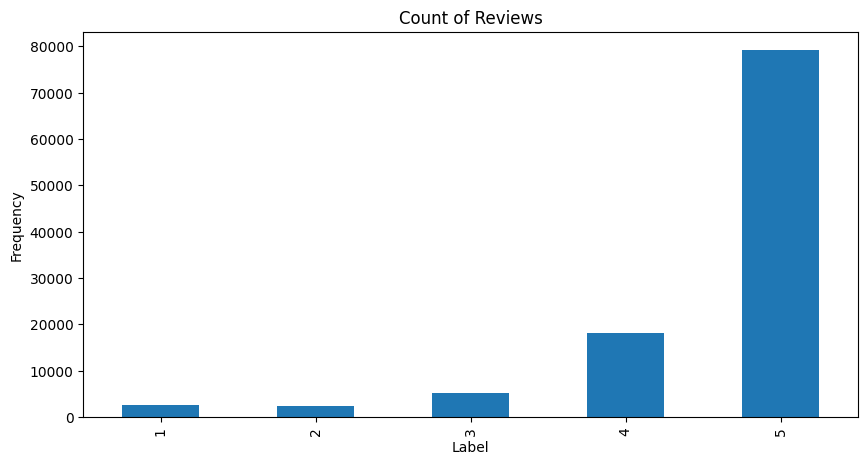

In [6]:
df['Label'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews', figsize=(10, 5)  )
plt.xlabel('Label')
plt.ylabel('Frequency')

In [7]:
example=df['Review'].values[30]
print(example)

Well-presented contents with comprehensive illustrations and easy to follow, cover in proper order every aspect of drawing and AutoCAD. Would appreciate if the English subtitle is available in the whole course, so more students could access to these handy lectures and exercises.


In [8]:
df.isnull().sum()

,0
Id,0
Review,0
Label,0


In [9]:
df.duplicated().sum()

0

# VADER Sentiment Scoring

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [11]:
sia=SentimentIntensityAnalyzer()

In [12]:
sia

In [13]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.765}

0 < neg < 1

0 < neu < 1

0 < pos < 1

-1 < compound < 1

In [14]:
sia.polarity_scores("this is so bad")

{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.6696}

In [15]:
new_rows = []
for index, row in df.iterrows():
  review = row['Review']
  sentiment_scores = sia.polarity_scores(review)
  new_rows.append({'id': index, **sentiment_scores})

new_df = pd.DataFrame(new_rows)
new_df

,id,neg,neu,pos,compound
0,0,0.0,0.152,0.848,0.6808
1,1,0.0,0.866,0.134,0.4754
2,2,0.0,0.575,0.425,0.8843
3,3,0.0,0.701,0.299,0.5719
4,4,0.0,0.794,0.206,0.3266
...,...,...,...,...,...
107013,107013,0.0,0.660,0.340,0.7712
107014,107014,0.0,0.261,0.739,0.9514
107015,107015,0.0,0.360,0.640,0.8360
107016,107016,0.0,0.707,0.293,0.8074


In [16]:
new_df=new_df.rename(columns={'id':'Id'})
new_df

,Id,neg,neu,pos,compound
0,0,0.0,0.152,0.848,0.6808
1,1,0.0,0.866,0.134,0.4754
2,2,0.0,0.575,0.425,0.8843
3,3,0.0,0.701,0.299,0.5719
4,4,0.0,0.794,0.206,0.3266
...,...,...,...,...,...
107013,107013,0.0,0.660,0.340,0.7712
107014,107014,0.0,0.261,0.739,0.9514
107015,107015,0.0,0.360,0.640,0.8360
107016,107016,0.0,0.707,0.293,0.8074


In [17]:
vaders = new_df.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,Review,Label
0,0,0.0,0.152,0.848,0.6808,good and interesting,5
1,1,0.0,0.866,0.134,0.4754,"This class is very helpful to me. Currently, I...",5
2,2,0.0,0.575,0.425,0.8843,like!Prof and TAs are helpful and the discussi...,5
3,3,0.0,0.701,0.299,0.5719,Easy to follow and includes a lot basic and im...,5
4,4,0.0,0.794,0.206,0.3266,Really nice teacher!I could got the point eazl...,4


Plot Vader Result

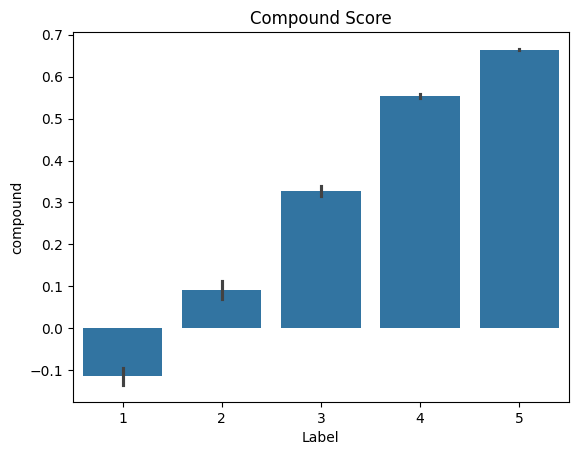

In [18]:
ax=sns.barplot(data=vaders, x='Label', y='compound')
ax.set_title('Compound Score')
plt.show()

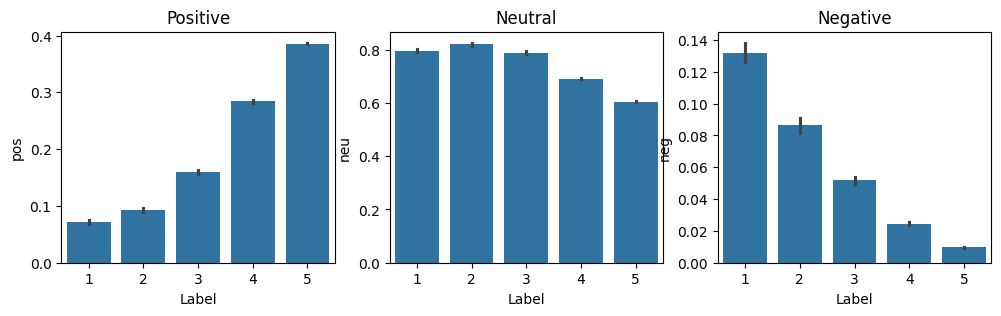

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Label', y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Label', y='neu',ax=axs[1])
sns.barplot(data=vaders, x='Label', y='neg',ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.show()